In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_directions(dy_dx, x, y):
    return dy_dx(x, y)

In [3]:
def draw_line_segment(ax, m, x_c, y_c, length=0.5, thickness=0.5, cmap='viridis'):
    # Half of the lenght from each side of the point (x_c, y_c)
    half_length = length / 2
    # How much should I move x to get half_length line
    perturbation = half_length / math.sqrt(1 + m**2)
    
    # Ends of the line-segment
    x0 = x_c - perturbation
    y0 = y_c - m*perturbation
    
    x1 = x_c + perturbation
    y1 = y_c + m*perturbation
    
    # For colors
    theta = (math.atan(m) + (math.pi/2)) * 250 / math.pi
    color = plt.get_cmap(cmap)(int(theta))
    out = ax.plot([x0, x1], [y0, y1], linewidth=thickness, color=color)
    return out

In [4]:
def draw_isocline(ax, m, x_c, y_c, levels=10, thickness=0.5):
    out = ax.contour(x_c, y_c, m, levels, linewidths=thickness)
    return out

### Circles centered at the origin

In [5]:
# Direction field of a circle
dy_dx = lambda x, y: -x/y

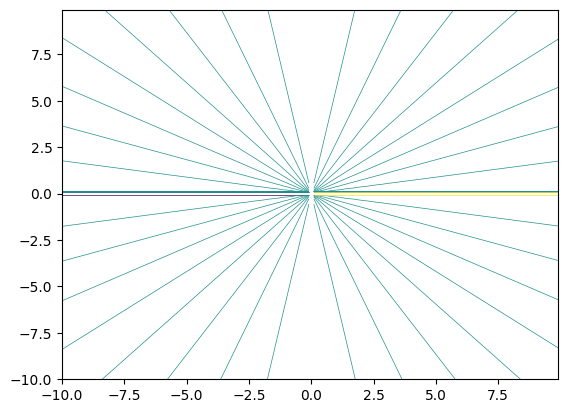

In [6]:
## ISOCLINE VISUALIZATION ##
# Meshgird
step_size = 0.1
x, y = np.meshgrid(np.arange(-10, 10., step_size), np.arange(-10, 10., step_size))
m = get_directions(dy_dx, x, y)
# Handeling devision by zero
m[:, 100] = np.inf

# Levels
eps = 1e-8
neg_levels = np.tan(np.linspace(np.pi/2 + eps, np.pi-eps, 10))
pos_levels = np.tan(np.linspace(0+eps, np.pi/2 - eps, 10))
levels = np.concatenate((neg_levels, pos_levels))

fig, ax = plt.subplots()
draw_isocline(ax, m, x, y, levels)

plt.show()

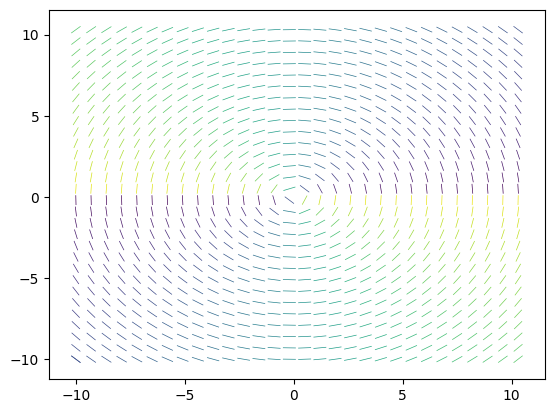

In [7]:
## LINE-SEGMENT VISUALIZATION ##
step_size = 0.7
x, y = np.meshgrid(np.arange(-10, 10.5, step_size), np.arange(-10, 10.5, step_size))
m = get_directions(dy_dx, x, y)

fig, ax = plt.subplots()
# Use np.vectorize to apply draw_line_segment to each element of m
draw_line_segment_vectorized = np.vectorize(draw_line_segment, excluded=['ax', 'length', 'thickness'])

# Apply draw_line_segment to each element of m
draw_line_segment_vectorized(ax=ax, m=m, x_c=x, y_c=y, length=step_size * 0.8)

plt.show()

## Circles tangent to Y at origin

In [8]:
dy_dx = lambda x, y: (y**2 - x **2) / (2*x*y)

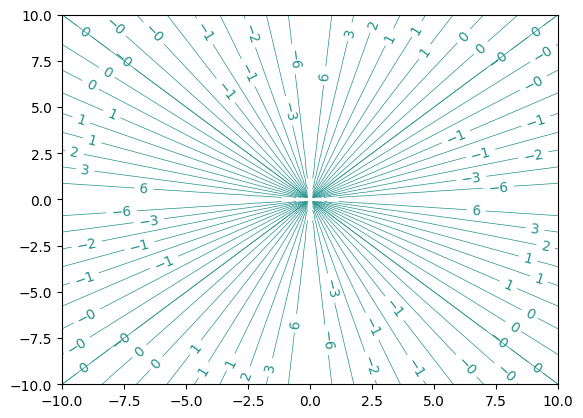

In [9]:
## ISOCLINE VISUALIZATION ##
# Meshgird
step_size = 0.1
x, y = np.meshgrid(np.arange(-10, 10.+step_size, step_size), np.arange(-10, 10.+step_size, step_size))
m = get_directions(dy_dx, x, y)
# Handeling devision by zero
m[100] = np.inf
m[:, 100] = np.inf

# Levels
eps = 1e-8
neg_levels = np.tan(np.linspace(np.pi/2 + eps, np.pi-eps, 10))
pos_levels = np.tan(np.linspace(0+eps, np.pi/2 - eps, 10))
levels = np.concatenate((neg_levels, pos_levels))

fig, ax = plt.subplots()
CS = draw_isocline(ax, m, x, y, levels)
ax.clabel(CS, inline=True, fontsize=10)
plt.show()

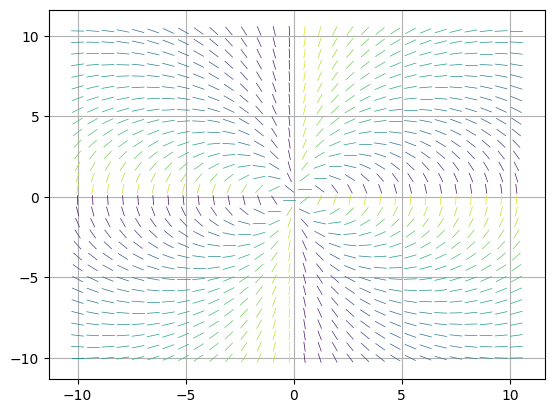

In [10]:
## LINE-SEGMENT VISUALIZATION ##
step_size = 0.7
x, y = np.meshgrid(np.arange(-10, 10.5, step_size), np.arange(-10, 10.5, step_size))
m = get_directions(dy_dx, x, y)

fig, ax = plt.subplots()
# Use np.vectorize to apply draw_line_segment to each element of m
draw_line_segment_vectorized = np.vectorize(draw_line_segment, excluded=['ax', 'length', 'thickness'])

# Apply draw_line_segment to each element of m
draw_line_segment_vectorized(ax=ax, m=m, x_c=x, y_c=y, length=step_size * 0.8)
ax.grid(True)
plt.show()

## y' = x^2 - y^2

In [14]:
# Direction field of a circle
dy_dx = lambda x, y: x**2 - y**2

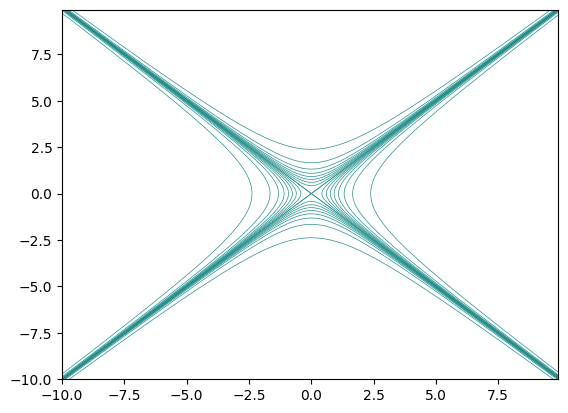

In [15]:
## ISOCLINE VISUALIZATION ##
# Meshgird
step_size = 0.1
x, y = np.meshgrid(np.arange(-10, 10., step_size), np.arange(-10, 10., step_size))
m = get_directions(dy_dx, x, y)

# Levels
eps = 1e-8
neg_levels = np.tan(np.linspace(np.pi/2 + eps, np.pi-eps, 10))
pos_levels = np.tan(np.linspace(0+eps, np.pi/2 - eps, 10))
levels = np.concatenate((neg_levels, pos_levels))

fig, ax = plt.subplots()
draw_isocline(ax, m, x, y, levels)

plt.show()

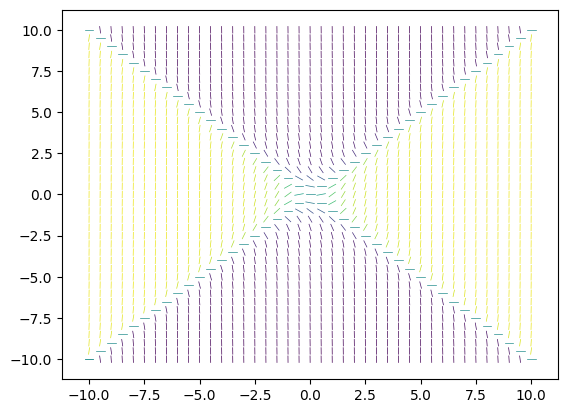

In [16]:
## LINE-SEGMENT VISUALIZATION ##
step_size = 0.5
x, y = np.meshgrid(np.arange(-10, 10.5, step_size), np.arange(-10, 10.5, step_size))
m = get_directions(dy_dx, x, y)

fig, ax = plt.subplots()
# Use np.vectorize to apply draw_line_segment to each element of m
draw_line_segment_vectorized = np.vectorize(draw_line_segment, excluded=['ax', 'length', 'thickness'])

# Apply draw_line_segment to each element of m
draw_line_segment_vectorized(ax=ax, m=m, x_c=x, y_c=y, length=step_size * 0.8)

plt.show()